In [813]:
import warnings
warnings.filterwarnings(action='ignore')
import sys
import seaborn as sb
import numpy as np
from pandas import read_excel, pivot_table, melt
from matplotlib import pyplot as plt

In [814]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

# 기술통계 연구과제

## 문제 1

다음 데이터는 조선시대 역대 왕의 수명을 조사한 데이터의 일부이다.

수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/kings_life.xlsx

| 왕  | 태조 | 정종 | 태종 | 세종 | 문종 | 단종 | 세조 | 예종 | 성종 | 연산 | 중종 | 인종 | 명종 | 선조 |
|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 수명 | 73 | 62 | 45 | 53 | 38 | 16 | 51 | 28 | 37 | 30 | 56 | 30 | 33 | 56 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [815]:
origin = read_excel('https://data.hossam.kr/pydata/kings_life.xlsx')
origin.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
왕,태조,정종,태종,세종,문종,단종,세조,예종,성종,연산,...,현종,숙종,경종,영조,정조,순조,헌종,철종,고종,순종
수명,73,62,45,53,38,16,51,28,37,30,...,33,59,36,82,48,44,22,32,67,52


In [816]:
origin['수명'].describe()

count    27.000000
mean     46.037037
std      16.173296
min      16.000000
25%      33.000000
50%      45.000000
75%      56.000000
max      82.000000
Name: 수명, dtype: float64

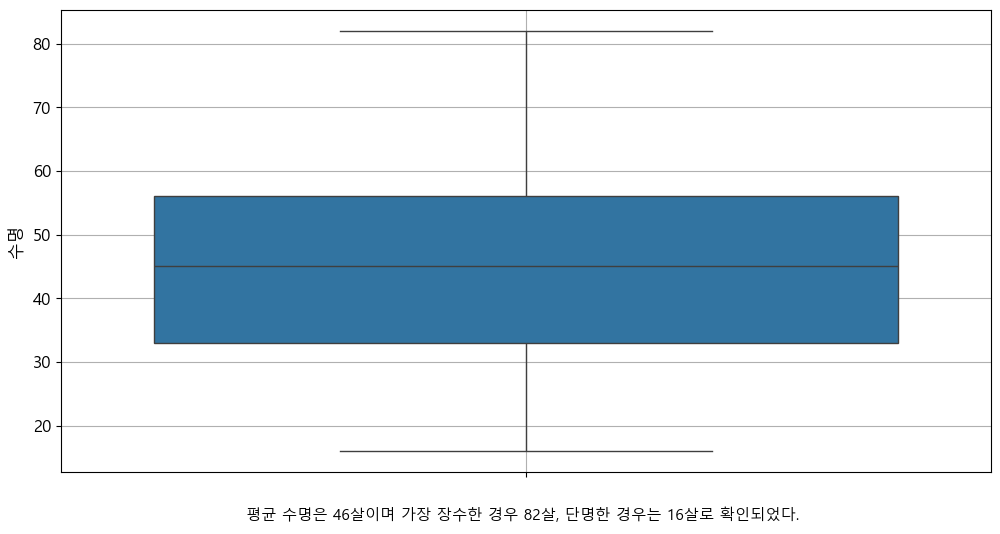

In [817]:

sb.boxplot(data=origin['수명'])
plt.grid()
plt.xlabel='수명'
plt.ylabel=''
txt = """평균 수명은 46살이며 가장 장수한 경우 82살, 단명한 경우는 16살로 확인되었다."""
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제1 상자그림.png',dpi=200)
plt.show()
plt.close()


## 문제2

다음은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.

외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/stock.xlsx

| 구분 | F   | K   | K   | F   | K   | K   | K   | K   | K   | F   | F   | F   | F   | F   |
|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 주가 | 120 | 165 | 147 | 144 | 135 | 161 | 102 | 165 | 170 | 147 | 235 | 161 | 139 | 150 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [818]:
origin_2 = read_excel('https://data.hossam.kr/pydata/stock.xlsx')
origin_2.T


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
구분,F,K,K,F,K,K,K,K,K,F,...,F,K,F,F,F,K,F,K,K,K
주가,120,165,147,144,135,161,102,165,170,147,...,157,173,139,150,157,173,163,145,129,145


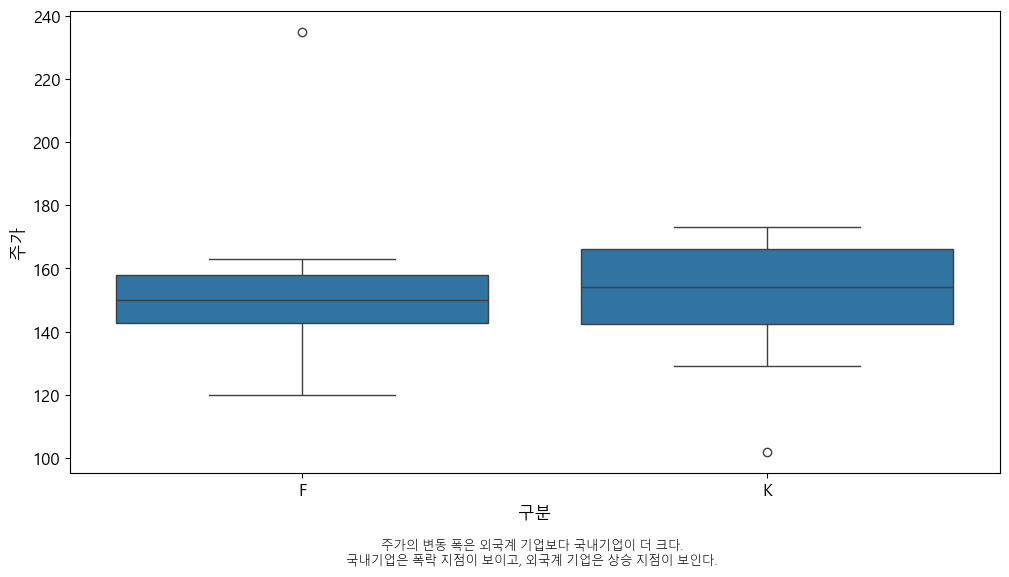

In [819]:
sb.boxplot(data=origin_2,x='구분',y='주가')


txt = """주가의 변동 폭은 외국계 기업보다 국내기업이 더 크다.
국내기업은 폭락 지점이 보이고, 외국계 기업은 상승 지점이 보인다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

In [820]:
mdf = melt(origin_2, id_vars = ['구분']).drop('variable', axis=1).rename(columns={'value':'주가'}).reset_index()
pvt1 = pivot_table(mdf,index = 'index',columns=  '구분', values='주가')
pvt1

구분,F,K
index,,
0,120.0,NaN
1,NaN,165.0
2,NaN,147.0
3,144.0,NaN
4,NaN,135.0
5,NaN,161.0
6,NaN,102.0
7,NaN,165.0
8,NaN,170.0


In [821]:
pvt1.describe()

구분,F,K
count,12.000000,12.000000
mean,155.166667,150.833333
std,27.764704,21.425700
min,120.000000,102.000000
25%,142.750000,142.500000
50%,150.000000,154.000000
75%,158.000000,166.250000
max,235.000000,173.000000


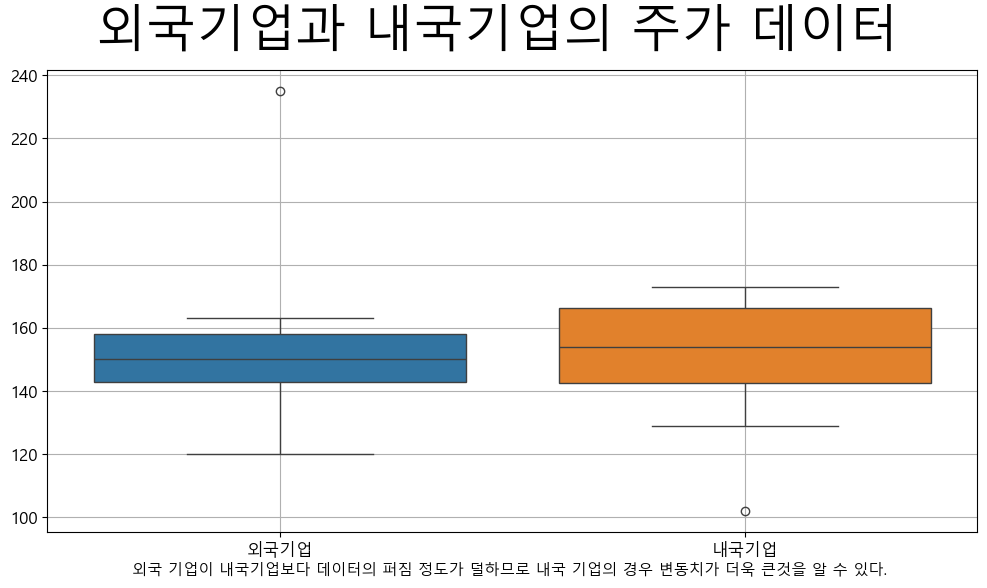

In [822]:
fig, ax1 = plt.subplots(1, 1)
txt = """외국 기업이 내국기업보다 데이터의 퍼짐 정도가 덜하므로 내국 기업의 경우 변동치가 더욱 큰것을 알 수 있다."""
plt.figtext(0.51, 0.06, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
sb.boxplot(data=pvt1,ax =ax1)
fig.suptitle('외국기업과 내국기업의 주가 데이터', fontsize=36, color='#000000')

ax1.grid()
ax1.set_xticklabels(['외국기업','내국기업'])
ax1.set(xlabel='', ylabel='')

plt.savefig('문제2 상자그림.png',dpi=200)
plt.show()
plt.close()


## 문제3

포도농장에서 수집한 비료 종류에 따른 수확량 자료이다.

기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/grape.xlsx

| 비료종류 | A    | B    | A    | A    | B    | A    | A    | A    | B    | B    | A    |
|------|------|------|------|------|------|------|------|------|------|------|------|
| 수확량  | 39.3 | 11.4 | 26.6 | 23.7 | 25.8 | 28.5 | 24.2 | 17.9 | 16.5 | 21.1 | 24.3 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [823]:
origin_3 = read_excel('https://data.hossam.kr/pydata/grape.xlsx')
origin_3.T


,0,1,2,3,4,5,6,7,8,9,10
비료종류,A,B,A,A,B,A,A,A,B,B,A
수확량,39.3,11.4,26.6,23.7,25.8,28.5,24.2,17.9,16.5,21.1,24.3


In [824]:
mdf = melt(origin_3, id_vars = ['비료종류']).drop('variable', axis=1).rename(columns={'value':'수확량'}).reset_index()
pvt2 = pivot_table(mdf,index = 'index',columns=  '비료종류', values='수확량')
pvt2

비료종류,A,B
index,,
0,39.3,NaN
1,NaN,11.4
2,26.6,NaN
3,23.7,NaN
4,NaN,25.8
5,28.5,NaN
6,24.2,NaN
7,17.9,NaN
8,NaN,16.5


In [825]:
pvt2.describe()

비료종류,A,B
count,7.000000,4.00000
mean,26.357143,18.70000
std,6.578211,6.17252
min,17.900000,11.40000
25%,23.950000,15.22500
50%,24.300000,18.80000
75%,27.550000,22.27500
max,39.300000,25.80000


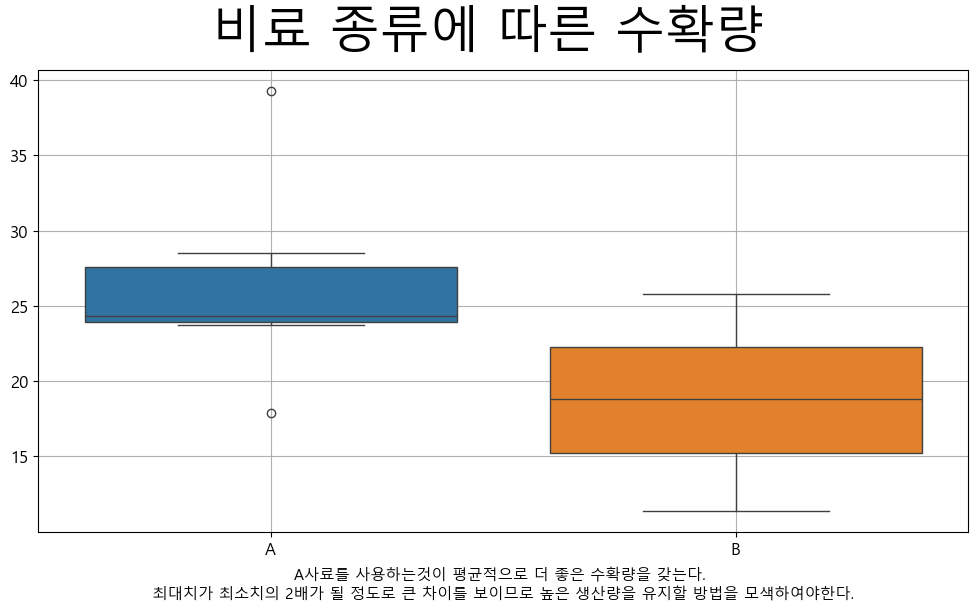

In [826]:
fig, ax1 = plt.subplots(1, 1)

sb.boxplot(data=pvt2,ax =ax1)
fig.suptitle('비료 종류에 따른 수확량', fontsize=36, color='#000000')

ax1.grid()
ax1.set(xlabel='', ylabel='')
txt = """A사료를 사용하는것이 평균적으로 더 좋은 수확량을 갖는다.\n 최대치가 최소치의 2배가 될 정도로 큰 차이를 보이므로 높은 생산량을 유지할 방법을 모색하여야한다."""
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제3 상자그림.png',dpi=200)
plt.show()
plt.close()


## 문제4

다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/pydata/analysis_grade.xlsx

| 학과 | C  | A  | A  | C  | A  | C  | A  | C  | C  | A  | C  | A  | A  | A  |
|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 점수 | 54 | 52 | 37 | 41 | 67 | 43 | 73 | 51 | 55 | 15 | 52 | 18 | 23 | 10 |

> 실제 엑셀 파일에는 위 표의 전치 형태로 저장되어 있습니다.

In [827]:
origin_4 = read_excel('https://data.hossam.kr/pydata/analysis_grade.xlsx')
origin_4.T


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
학과,C,A,A,C,A,C,A,C,C,A,...,A,A,C,C,A,C,A,A,A,A
점수,54,52,37,41,67,43,73,51,55,15,...,33,28,90,54,52,53,51,78,30,44


In [828]:
mdf = melt(origin_4, id_vars = ['학과']).drop('variable', axis=1).rename(columns={'value':'점수'}).reset_index()
pvt3 = pivot_table(mdf,index = 'index',columns=  '학과', values='점수')
pvt3.sort_values(['C','A'])

학과,A,C
index,,
3,NaN,41.0
5,NaN,43.0
14,NaN,48.0
7,NaN,51.0
16,NaN,51.0
10,NaN,52.0
27,NaN,53.0
0,NaN,54.0
25,NaN,54.0


In [829]:
pvt3.describe()


학과,A,C
count,20.000000,12.000000
mean,43.750000,56.166667
std,20.229928,14.689720
min,10.000000,41.000000
25%,29.500000,50.250000
50%,42.500000,52.500000
75%,55.000000,54.250000
max,78.000000,90.000000


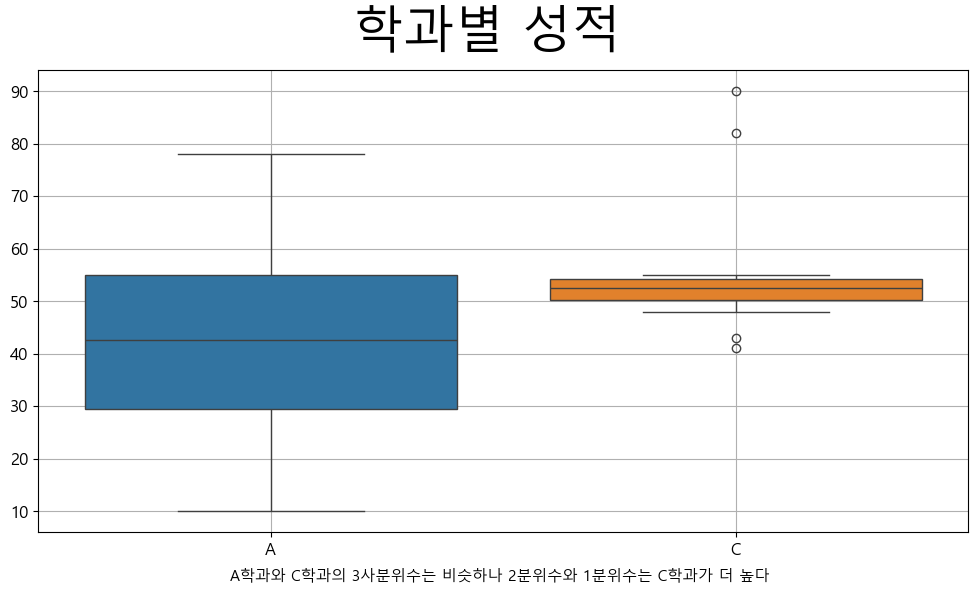

In [830]:
fig, ax1 = plt.subplots(1, 1)

sb.boxplot(data=pvt3,ax =ax1)
fig.suptitle('학과별 성적', fontsize=36, color='#000000')

ax1.grid()
ax1.set(xlabel='', ylabel='')
txt = """A학과와 C학과의 3사분위수는 비슷하나 2분위수와 1분위수는 C학과가 더 높다"""
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제4 상자그림.png',dpi=200)
plt.show()
plt.close()


## 문제5

다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

> https://data.hossam.kr/pydata/stat_comp_grade.xlsx

| 전공   | 중간고사 | 기말고사 |
|------|------|------|
| STAT | 34   | 86   |
| STAT | 50   | 77   |
| STAT | 75   | 74   |
| COMP | 76   | 96   |
| COMP | 61   | 78   |
| COMP | 65   | 40   |
| COMP | 31   | 68   |
| STAT | 47   | 57   |
| STAT | 94   | 82   |
| COMP | 49   | 57   |
| STAT | 38   | 53   |
| STAT | 65   | 70   |
| STAT | 47   | 60   |
| STAT | 88   | 95   |
| COMP | 80   | 85   |
| COMP | 87   | 90   |
| STAT | 92   | 95   |
| STAT | 70   | 80   |
| STAT | 78   | 85   |
| COMP | 76   | 85   |

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [831]:
origin_5 = read_excel('https://data.hossam.kr/pydata/stat_comp_grade.xlsx')
origin_5

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [832]:
origin_5['major'] = np.where(origin_5['전공'] == 'STAT', 1, 2)
origin_5 = origin_5.drop('전공',axis=1).rename(columns={'major':'전공'}).reindex(columns=['전공', '중간고사', '기말고사'])
origin_5

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [833]:
origin_5[['중간고사','기말고사']].describe()

,중간고사,기말고사
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


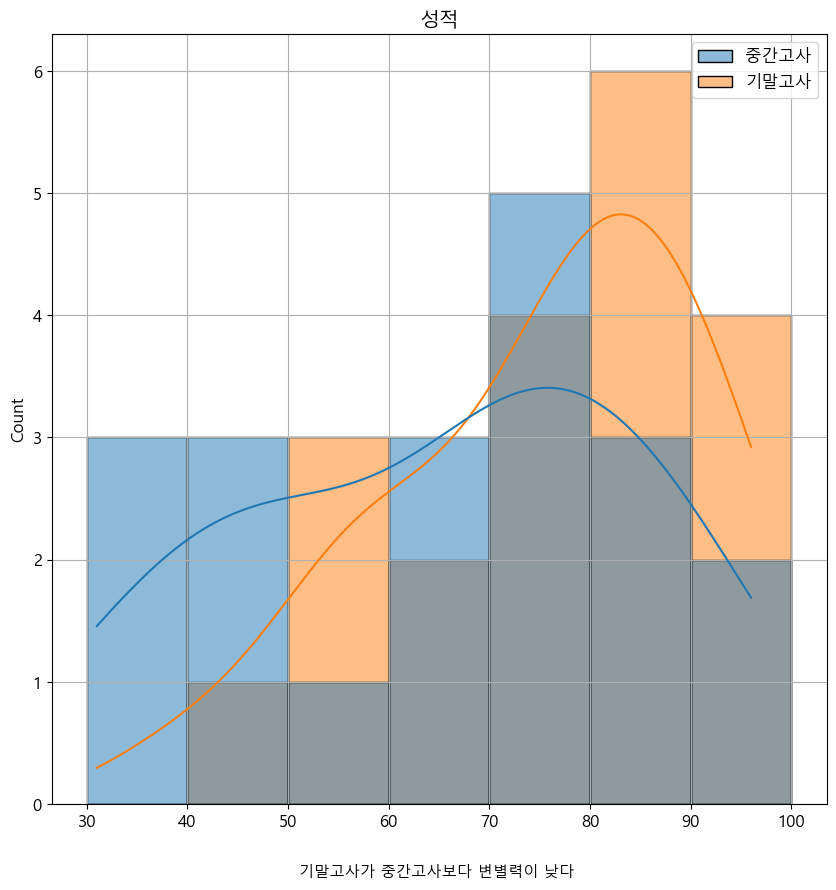

In [834]:
plt.figure(figsize=(10, 10), dpi=100)
sb.histplot(data=origin_5[['중간고사','기말고사']], bins=[30,40,50,60,70,80,90,100],kde = True)
plt.grid()
plt.ylabel=''
plt.title("성적")
txt = """기말고사가 중간고사보다 변별력이 낮다"""
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제5(3) 히스토그램.png',dpi=200)
plt.show()
plt.close()

In [835]:
origin_5.groupby('전공').describe()

중간고사                                                      기말고사             \
   count       mean        std   min   25%   50%   75%   max count       mean   
전공                                                                              
1   12.0  64.833333  21.225342  34.0  47.0  67.5  80.5  94.0  12.0  76.166667   
2    8.0  65.625000  18.423103  31.0  58.0  70.5  77.0  87.0   8.0  74.875000   

                                               
          std   min    25%   50%    75%   max  
전공                                             
1   13.953386  53.0  67.50  78.5  85.25  95.0  
2   18.795421  40.0  65.25  81.5  86.25  96.0

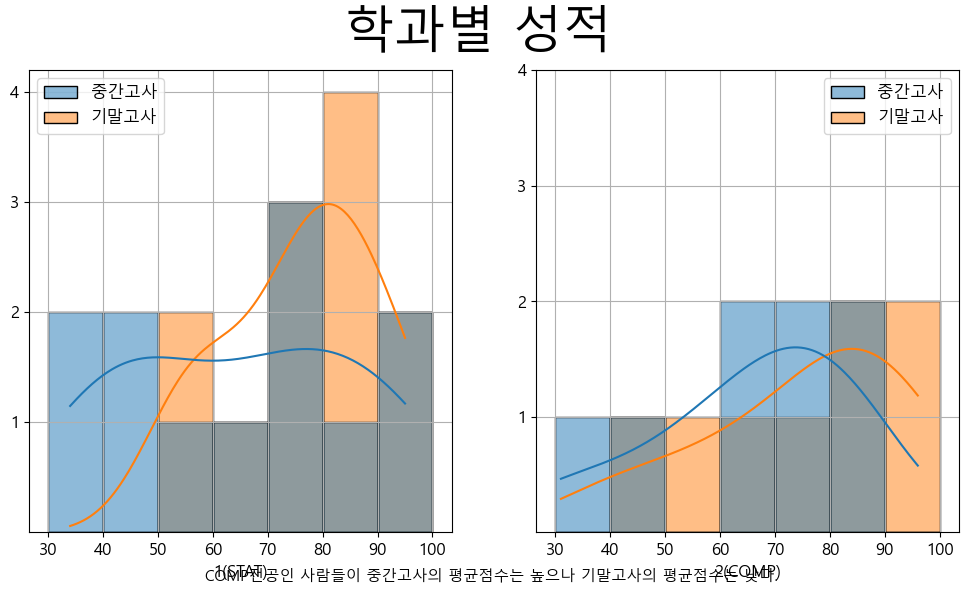

In [836]:
fig, (ax1,ax2) = plt.subplots(1, 2)

sb.histplot(data=origin_5.query('전공==1').drop('전공',axis=1),ax =ax1,bins=[30,40,50,60,70,80,90,100],kde = True)
fig.suptitle('학과별 성적', fontsize=36, color='#000000')
sb.histplot(data=origin_5.query('전공==2').drop('전공',axis=1),ax =ax2,bins=[30,40,50,60,70,80,90,100],kde = True)
ax2.grid()
ax2.set(xlabel='2(COMP)', ylabel='')
ax1.set_yticks([1,2,3,4])
ax2.set_yticks([1,2,3,4])
ax1.grid()
ax1.set(xlabel='1(STAT)', ylabel='')
txt = """COMP전공인 사람들이 중간고사의 평균점수는 높으나 기말고사의 평균점수는 낮다."""
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제5(4) 히스토그램.png',dpi=200)
plt.show()
plt.close()


## 문제6

Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

> https://data.hossam.kr/pydata/wage.xlsx

| year | age  | maritl           | race     | education       | region             | jobclass       | health         | health_ins | logwage | wage  |
|------|------|------------------|----------|-----------------|--------------------|----------------|----------------|------------|---------|-------|
| 2006 | 18.0 | 1. Never Married | 1. White | 1. < HS Grad    | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 2. No      | 4.3     | 75.0  |
| 2004 | 24.0 | 1. Never Married | 1. White | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 2. No      | 4.3     | 70.5  |
| 2003 | 45.0 | 2. Married       | 1. White | 3. Some College | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 1. Yes     | 4.9     | 131.0 |
| 2003 | 43.0 | 2. Married       | 3. Asian | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 1. Yes     | 5.0     | 154.7 |
| 2005 | 50.0 | 4. Divorced      | 1. White | 2. HS Grad      | 2. Middle Atlantic | 2. Information | 1. <=Good      | 1. Yes     | 4.3     | 75.0  |

각 변수는 다음과 같은 의미를 갖는다.

| 변수명 | 의미 |
|--|--|
| year | 탄생년도 |
| age | 나이 |
| maritl | 결혼여부 |
| race | 근로자의 인종 |
| education | 교육수준 |
| region | 지역 |
| jobclass | 직군 |
| health | 건상상태 |
| health_ins | 건강보험 가입 여부 |
| logwage | 임금(로그값) |
| wage | 임금 |

이 데이터셋을 활용하여 다음 물음에 답하시오.

1. 데이터를 로드하여 명목형 변수를 `1`, `2` 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

2. 레이블링 된 명목형 변수를 `category` 타입으로 변경하시오.

3. 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [837]:
origin_6 = read_excel('https://data.hossam.kr/pydata/wage.xlsx')
origin_6

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


1. 데이터를 로드하여 명목형 변수를 `1`, `2` 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

In [838]:
origin_6.dtypes
df = origin_6.copy()
A =['maritl','race','education','region','jobclass','health','health_ins']
for ii in A:
    a = df[ii]
    for i,v in enumerate(a):
        a[i] = int(v[:1])


2. 레이블링 된 명목형 변수를 `category` 타입으로 변경하시오.

In [839]:
df = df.drop('year',axis=1).astype({"age": "float64", "maritl": "category", "race": "category", "region": "category","jobclass":"category","education":"category","health":"category","health_ins":"category"})
df.dtypes

age            float64
maritl        category
race          category
education     category
region        category
jobclass      category
health        category
health_ins    category
logwage        float64
wage           float64
dtype: object

3. 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [840]:
df.describe()

,age,logwage,wage
count,3000.000000,3000.000000,3000.000000
mean,42.414667,4.653905,111.703608
std,11.542406,0.351753,41.728595
min,18.000000,3.000000,20.085537
25%,33.750000,4.447158,85.383940
50%,42.000000,4.653213,104.921507
75%,51.000000,4.857332,128.680488
max,80.000000,5.763128,318.342430


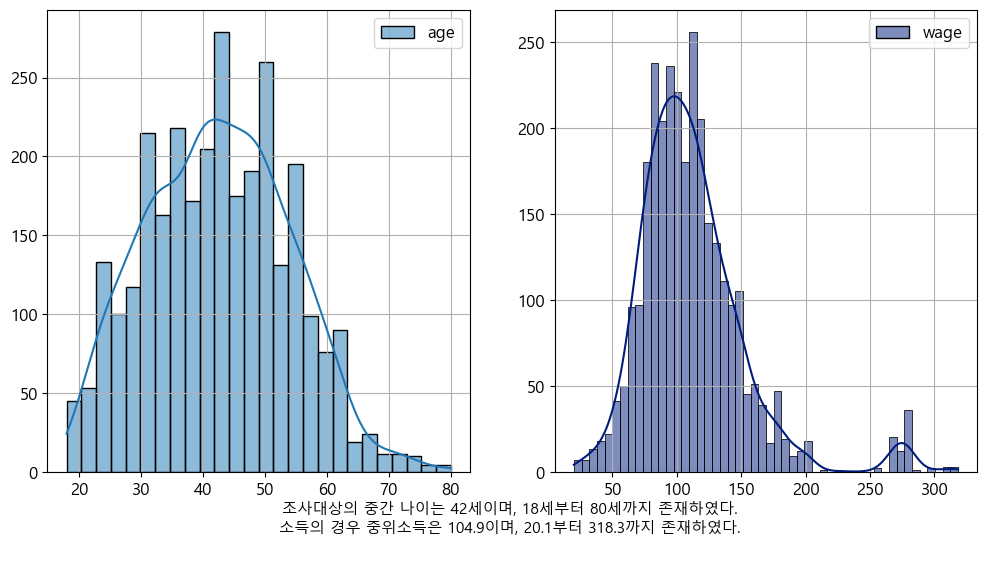

In [841]:
fig, (ax1,ax2) = plt.subplots(1, 2)
sb.histplot(df[['age']],ax=ax1,color='#61d800',kde=True)
sb.histplot(df[['wage']],ax=ax2,palette='dark',kde=True)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.grid()
ax2.grid()
txt = """
조사대상의 중간 나이는 42세이며, 18세부터 80세까지 존재하였다.
소득의 경우 중위소득은 104.9이며, 20.1부터 318.3까지 존재하였다.
 """
plt.figtext(0.51, 0.09, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})

plt.savefig('문제6(3) 히스토그램.png',dpi=200)
plt.show()
plt.close()

4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

In [842]:
df_=df[['maritl','race','education','region','jobclass','health','health_ins']]
df_.describe()

,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000
unique,5,4,5,1,2,2,2
top,2,1,2,2,1,2,1
freq,2074,2480,971,3000,1544,2142,2083


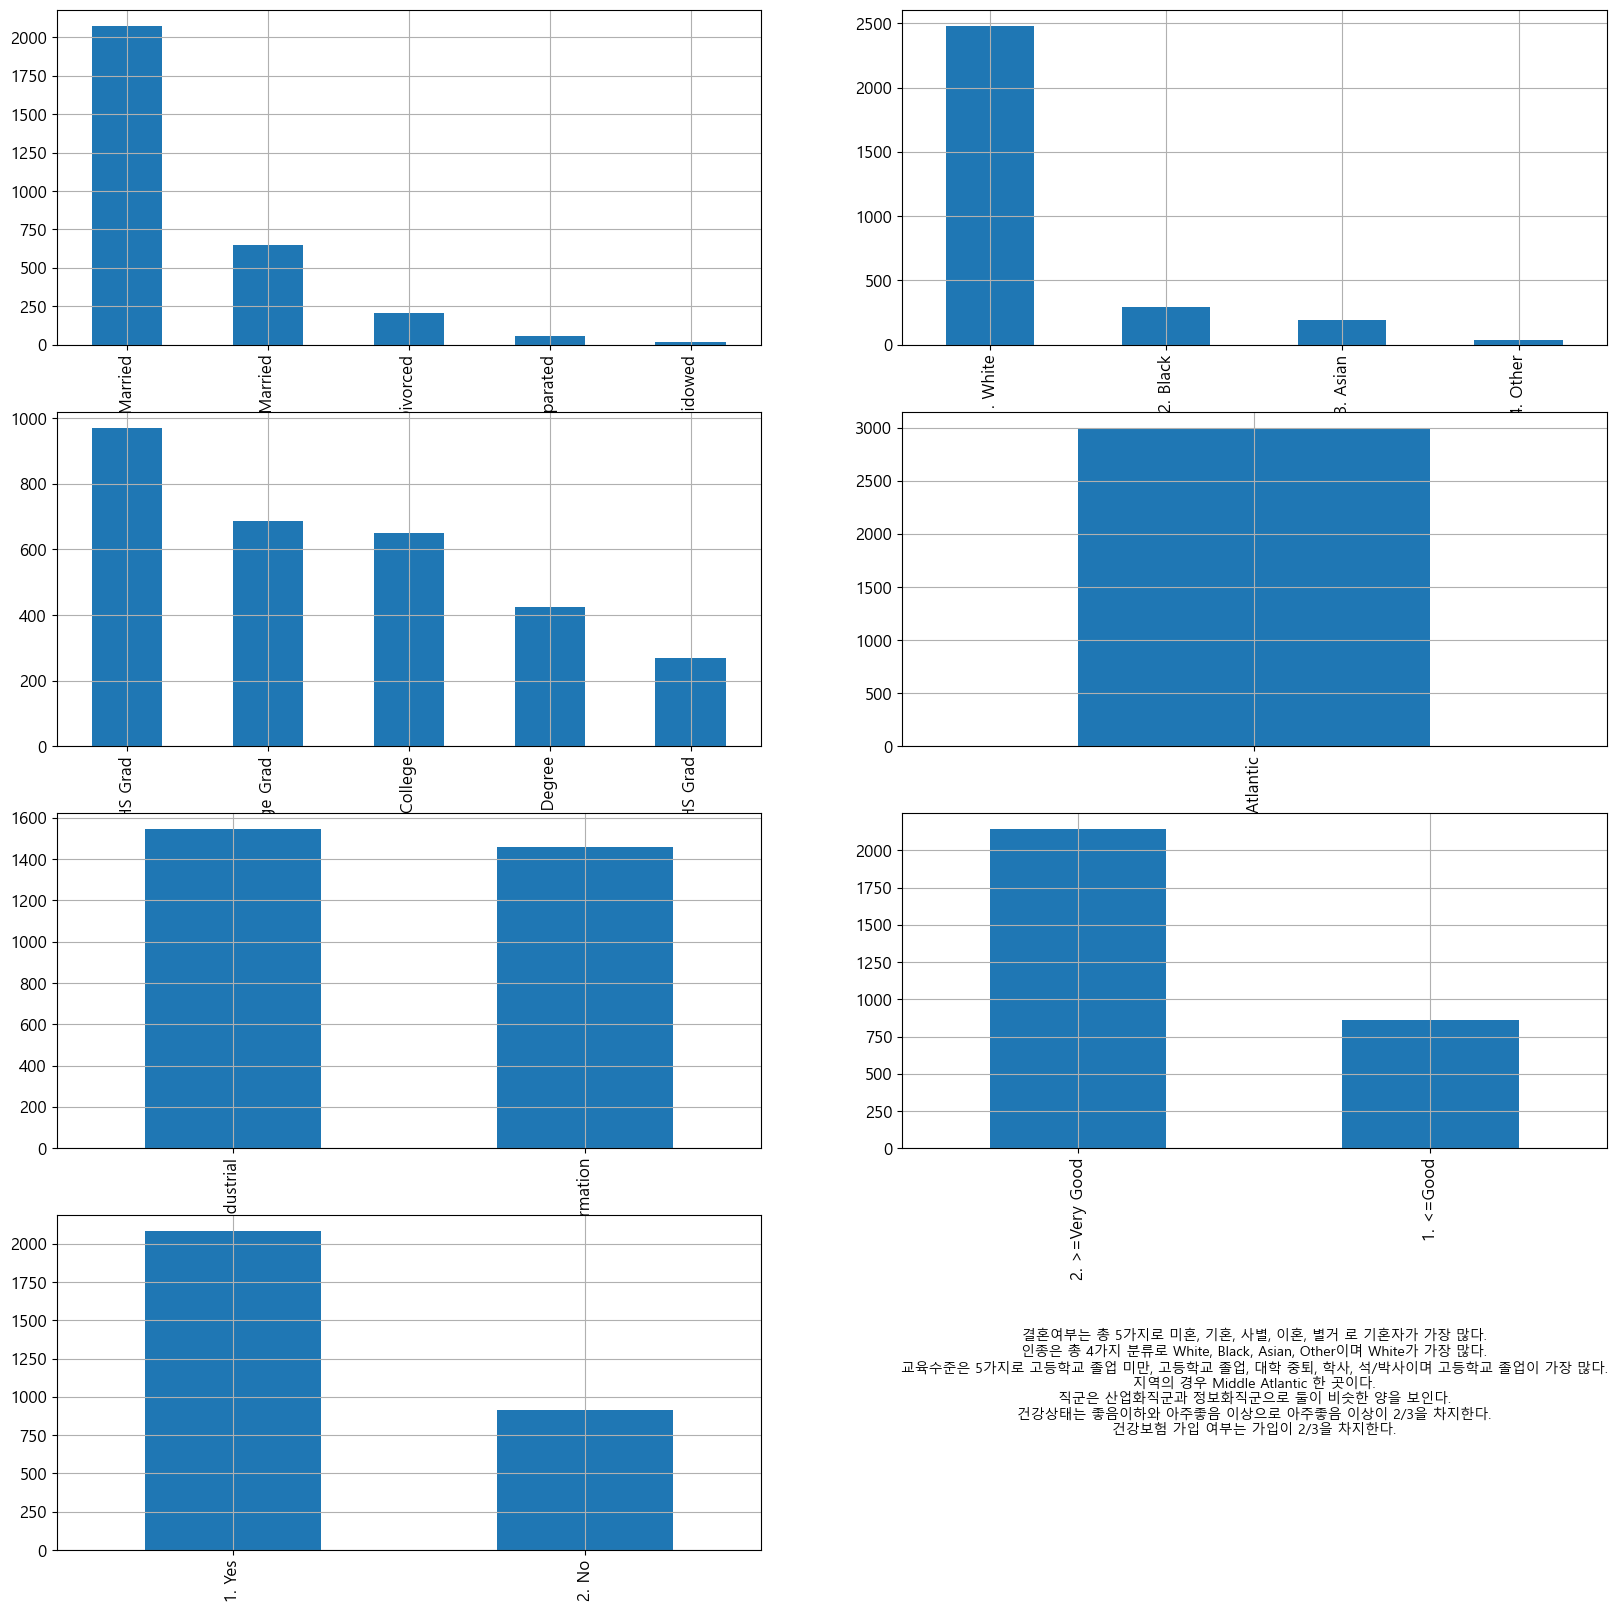

In [852]:
plt.rcParams["figure.figsize"] = (20, 20)


fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2)

A= ['maritl','race','education','region','jobclass','health','health_ins']
B = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for ii,i in enumerate(A):
    origin_6[i].value_counts().plot(kind='bar',ax=B[ii],legend=False)
    B[ii].grid()
    B[ii].set_xlabel('')
    B[ii].set_ylabel('')

ax8.text(0.5, 0.5, ''' 
결혼여부는 총 5가지로 미혼, 기혼, 사별, 이혼, 별거 로 기혼자가 가장 많다.
인종은 총 4가지 분류로 White, Black, Asian, Other이며 White가 가장 많다.
교육수준은 5가지로 고등학교 졸업 미만, 고등학교 졸업, 대학 중퇴, 학사, 석/박사이며 고등학교 졸업이 가장 많다.
지역의 경우 Middle Atlantic 한 곳이다.
직군은 산업화직군과 정보화직군으로 둘이 비슷한 양을 보인다.
건강상태는 좋음이하와 아주좋음 이상으로 아주좋음 이상이 2/3을 차지한다.
건강보험 가입 여부는 가입이 2/3을 차지한다.
''', fontsize=10, ha='center', va='center')
ax8.axis('off') # 해당 그래프프레임을 삭제함
# ax8.axis(False) # 해당 그래프프레임을 삭제함

plt.savefig('문제6(4) 막대그래프.png',dpi=200)
plt.show()
plt.close()

5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [844]:
pvt = pivot_table(df[['maritl','wage']].reset_index(),index='index',columns='maritl',values='wage')
pvt.describe()

maritl,1,2,3,4,5
count,648.000000,2074.000000,19.000000,204.000000,55.000000
mean,92.734649,118.860261,99.538655,103.159261,101.215787
std,32.920068,43.120554,23.741055,33.800978,33.663381
min,23.274704,20.085537,54.598150,22.962401,61.187526
25%,73.775743,91.699226,86.682487,83.704378,81.283253
50%,87.981033,112.648896,104.921507,99.689464,95.230713
75%,107.903924,134.705375,118.015588,118.235905,112.184873
max,314.329336,318.342430,141.775172,281.745971,277.799480


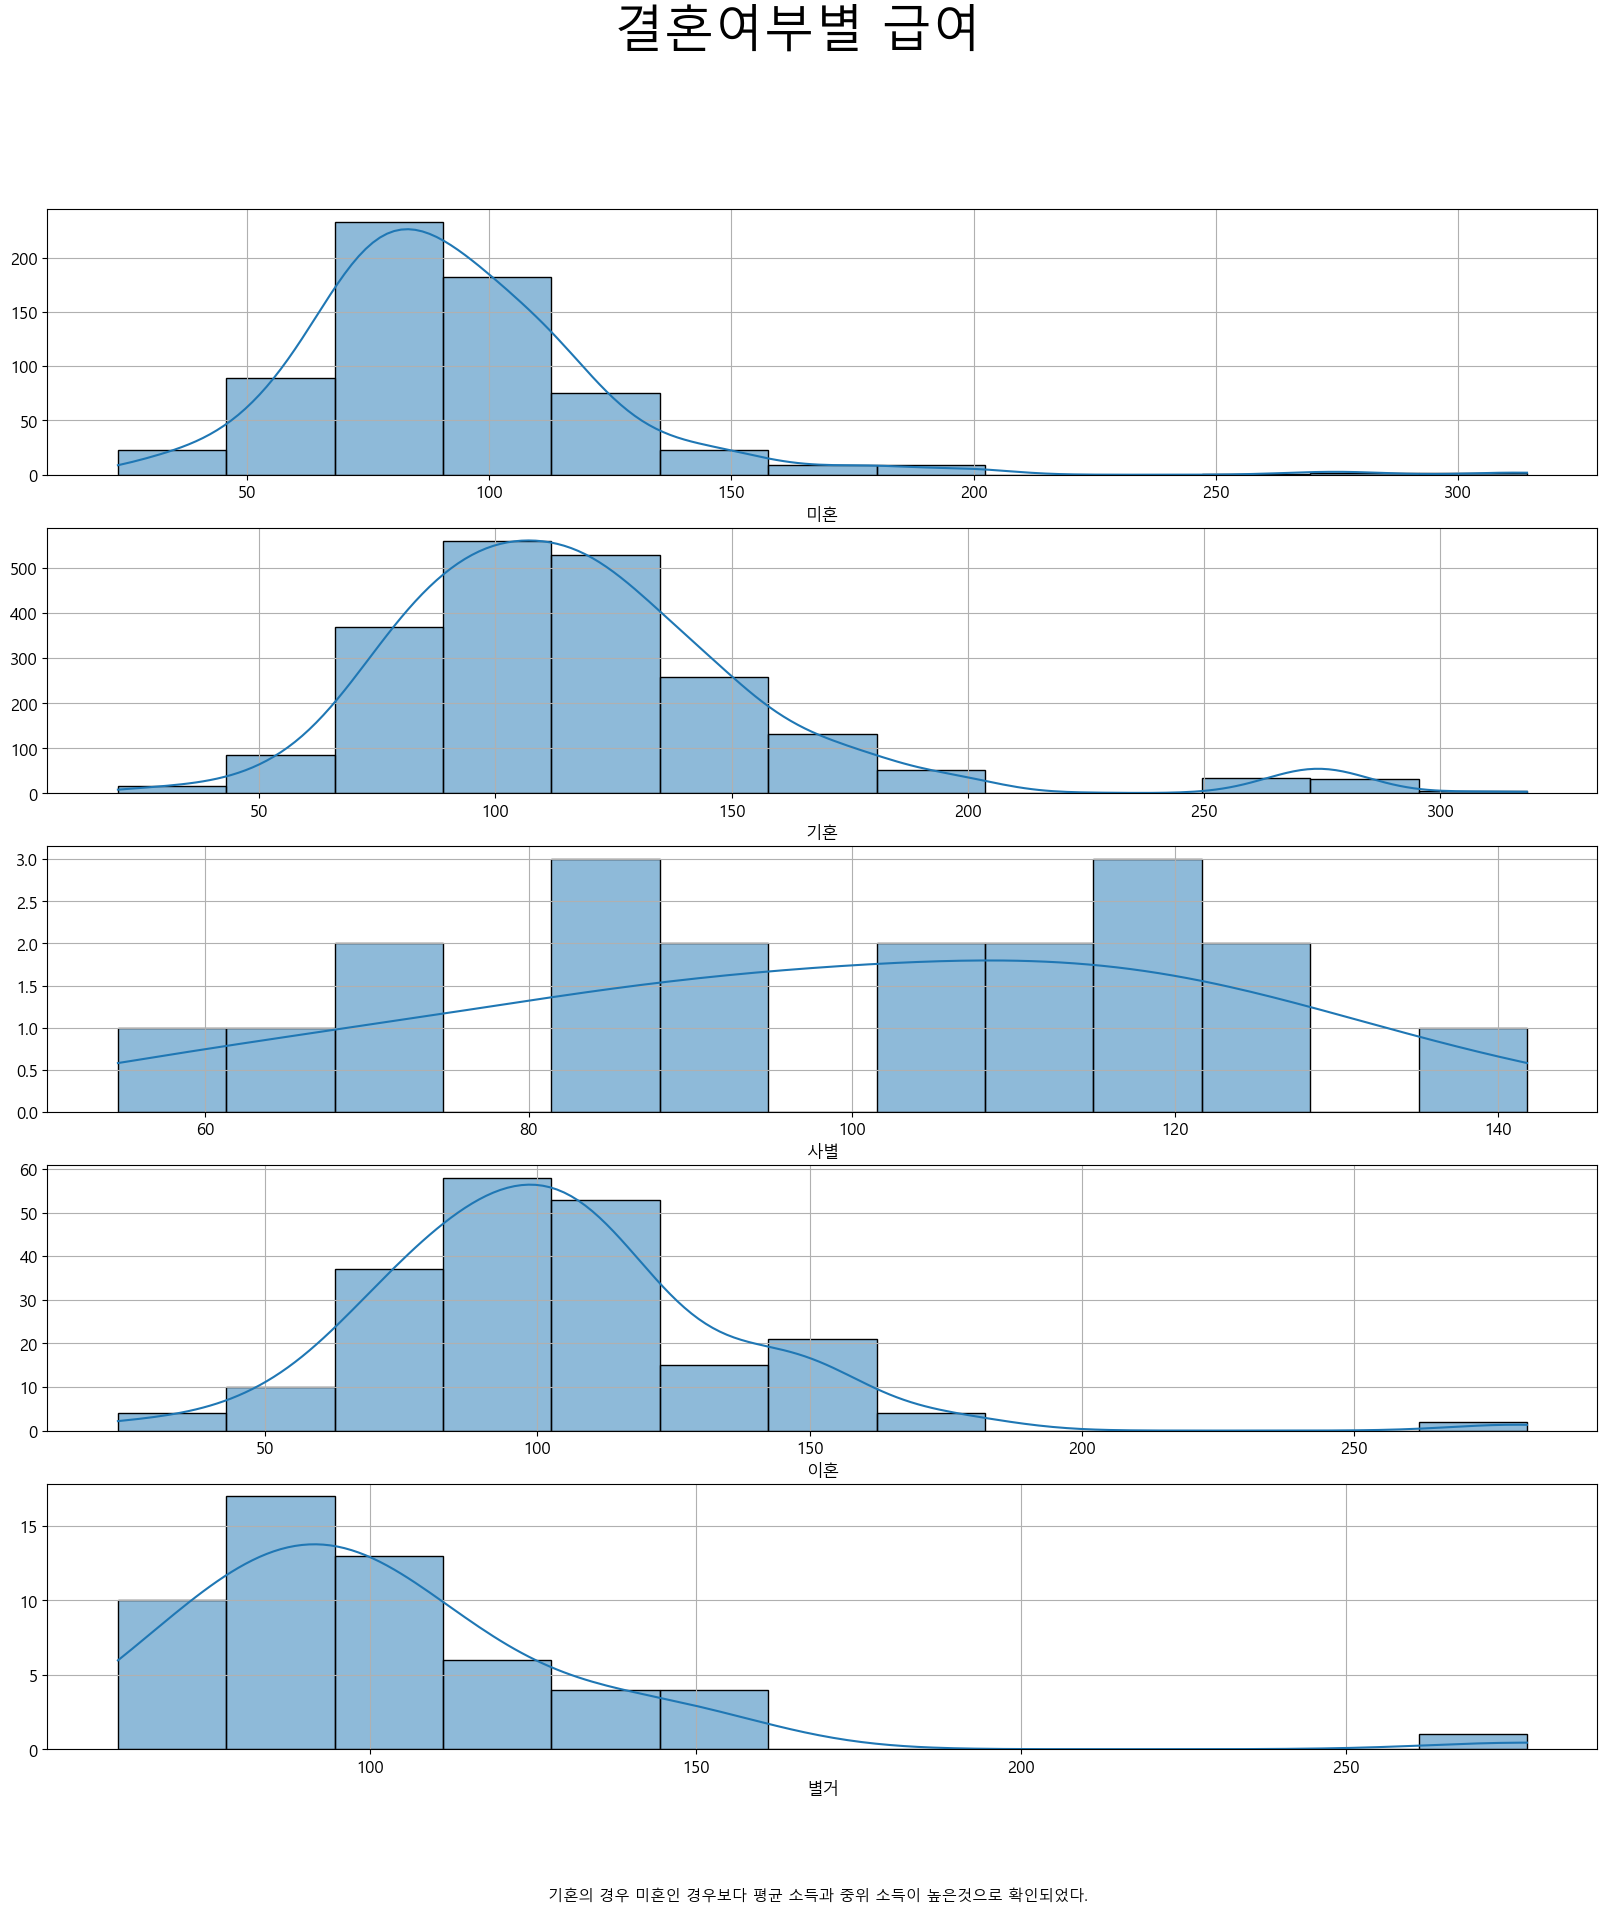

In [845]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1)
fig.suptitle('결혼여부별 급여', fontsize=36, color='#000000')

sb.histplot(pvt.iloc[:,0],ax=ax1,bins=13,legend=False,kde=True)
sb.histplot(pvt.iloc[:,1],ax=ax2,bins=13,legend=False,kde=True)
sb.histplot(pvt.iloc[:,2],ax=ax3,bins=13,legend=False,kde=True)
sb.histplot(pvt.iloc[:,3],ax=ax4,bins=13,legend=False,kde=True)
sb.histplot(pvt.iloc[:,4],ax=ax5,bins=13,kde=True)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax1.set_xlabel('미혼')
ax2.set_xlabel('기혼')
ax3.set_xlabel('사별')
ax4.set_xlabel('이혼')
ax5.set_xlabel('별거')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
txt = """
기혼의 경우 미혼인 경우보다 평균 소득과 중위 소득이 높은것으로 확인되었다.
 """
plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제6(5) 히스토그램.png',dpi=200)
plt.show()
plt.close()

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [846]:
pvt = pivot_table(origin_6[['education','wage']].reset_index(),index='index',columns='education',values='wage')
pvt.describe()

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
count,268.000000,971.000000,650.000000,685.000000,426.000000
mean,84.104415,95.783351,107.755566,124.427908,150.917776
std,21.578051,28.567560,32.474725,41.189071,53.904206
min,20.934378,23.274704,20.085537,32.366413,38.605915
25%,70.261774,77.946382,89.242885,99.689464,117.146817
50%,81.283253,94.072715,104.921507,118.884359,141.775172
75%,97.493294,109.833986,121.388422,143.134941,171.497631
max,152.216807,318.342430,314.329336,281.745971,318.342430


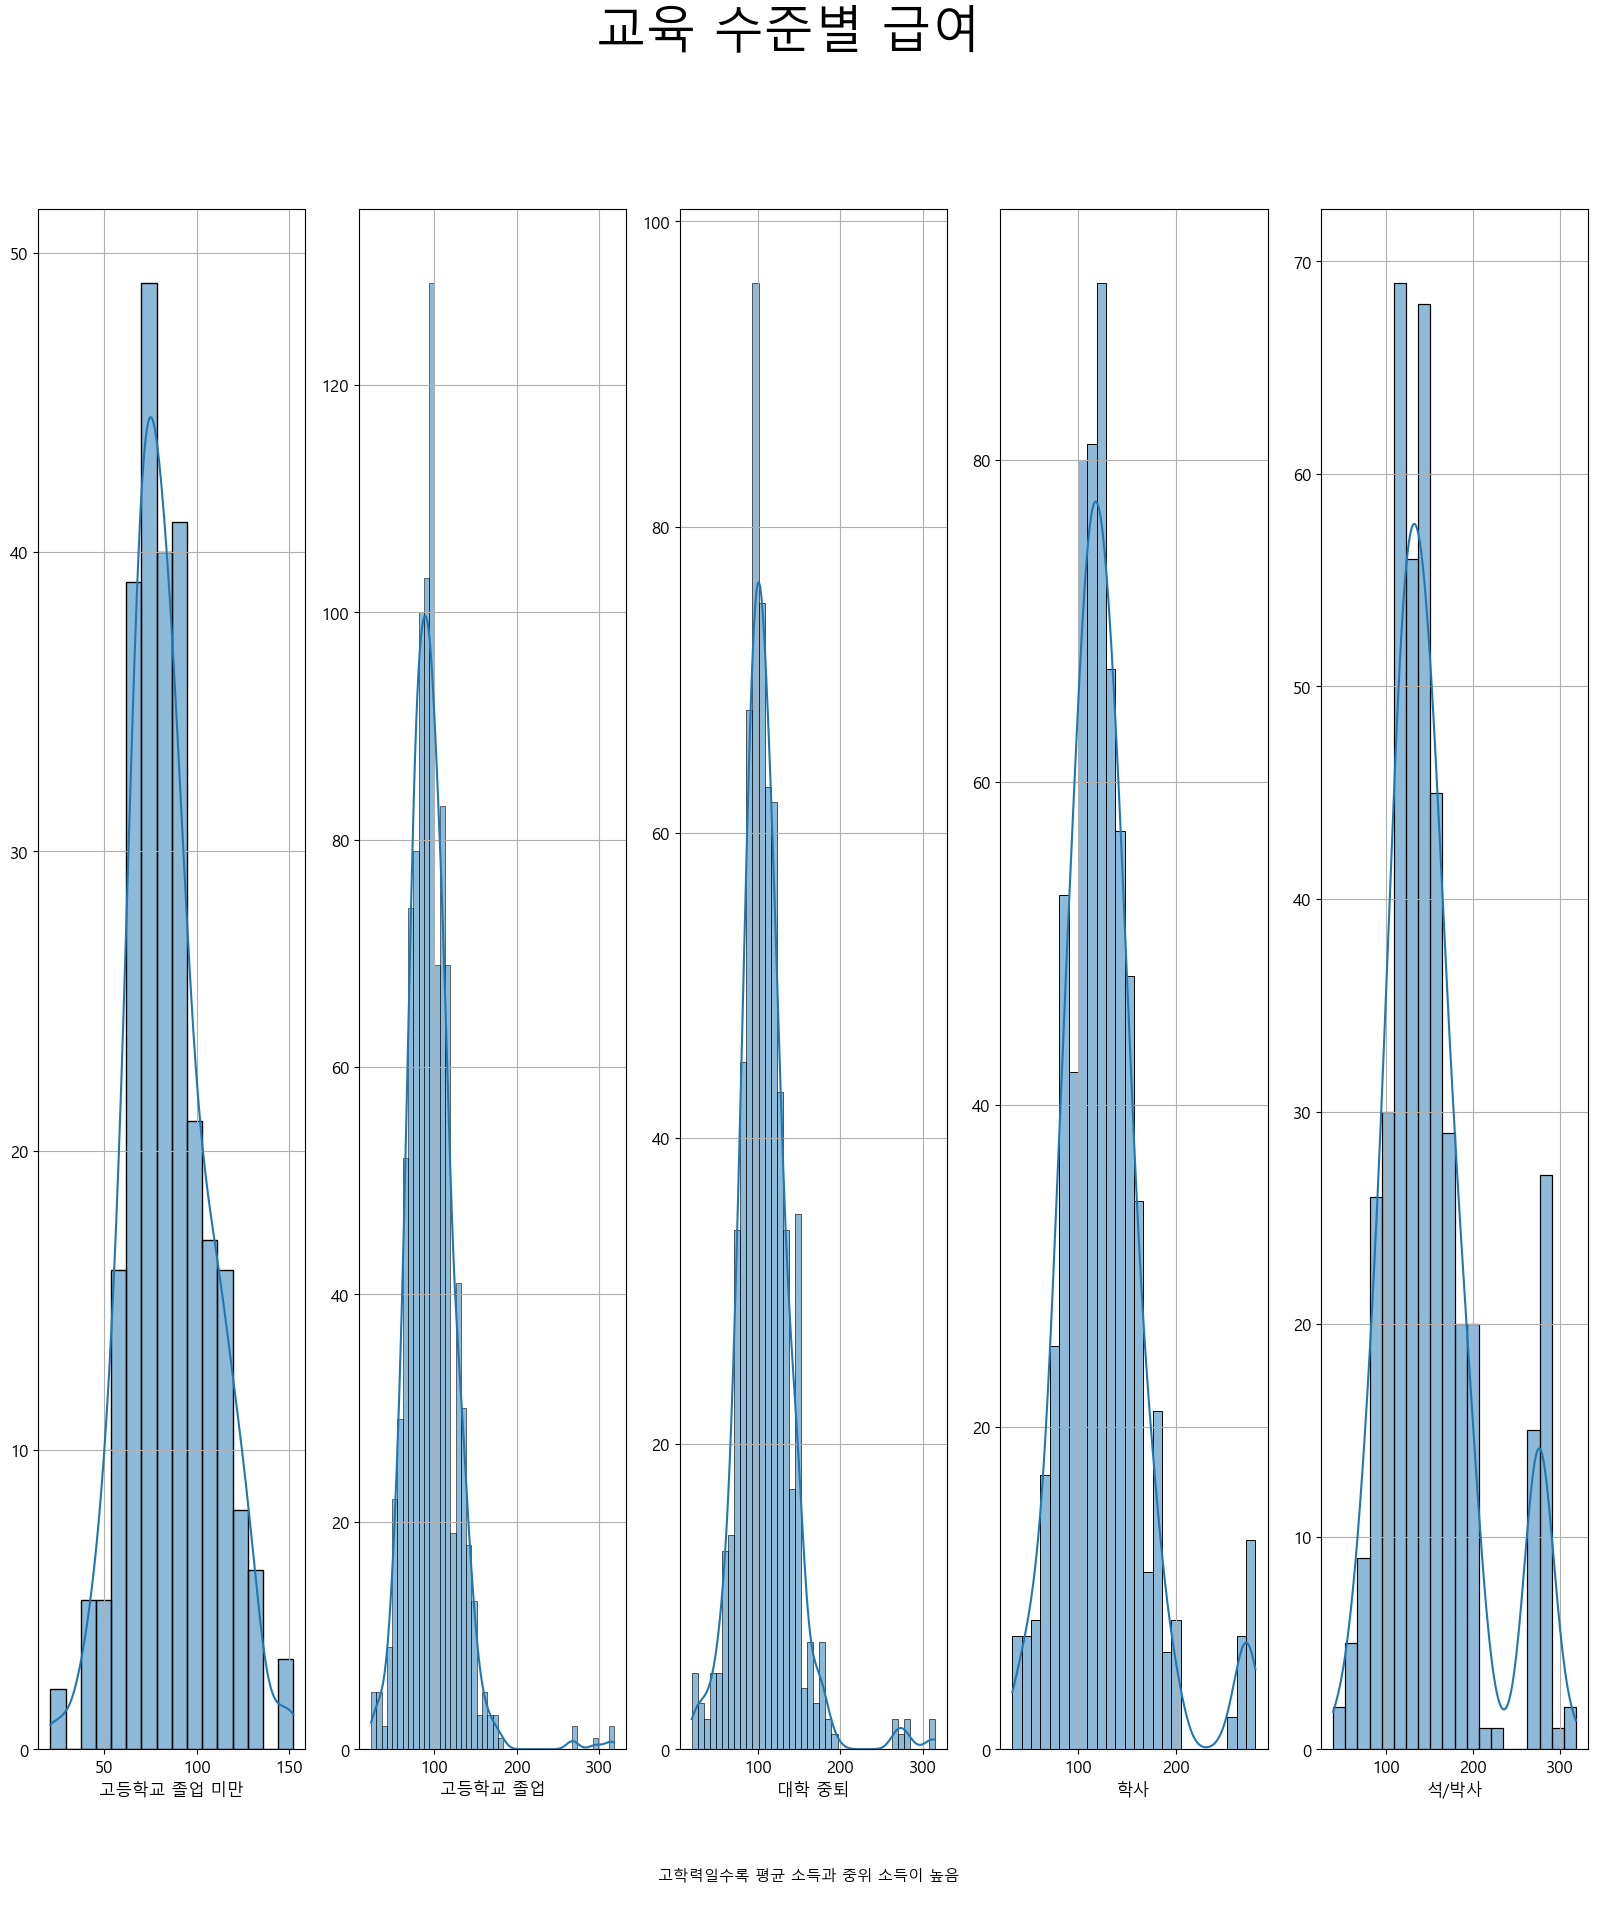

In [847]:

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
fig.suptitle('교육 수준별 급여', fontsize=36, color='#000000')
sb.histplot(pvt.iloc[:,0],ax=ax1,legend=False,kde=True)
sb.histplot(pvt.iloc[:,1],ax=ax2,legend=False,kde=True)
sb.histplot(pvt.iloc[:,2],ax=ax3,legend=False,kde=True)
sb.histplot(pvt.iloc[:,3],ax=ax4,legend=False,kde=True)
sb.histplot(pvt.iloc[:,4],ax=ax5,kde=True)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax1.set_xlabel('고등학교 졸업 미만')
ax2.set_xlabel('고등학교 졸업')
ax3.set_xlabel('대학 중퇴')
ax4.set_xlabel('학사')
ax5.set_xlabel('석/박사')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
txt = """
고학력일수록 평균 소득과 중위 소득이 높음
 """
plt.figtext(0.51, 0.06, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제6(6) 히스토그램.png',dpi=200)
plt.show()
plt.close()

7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

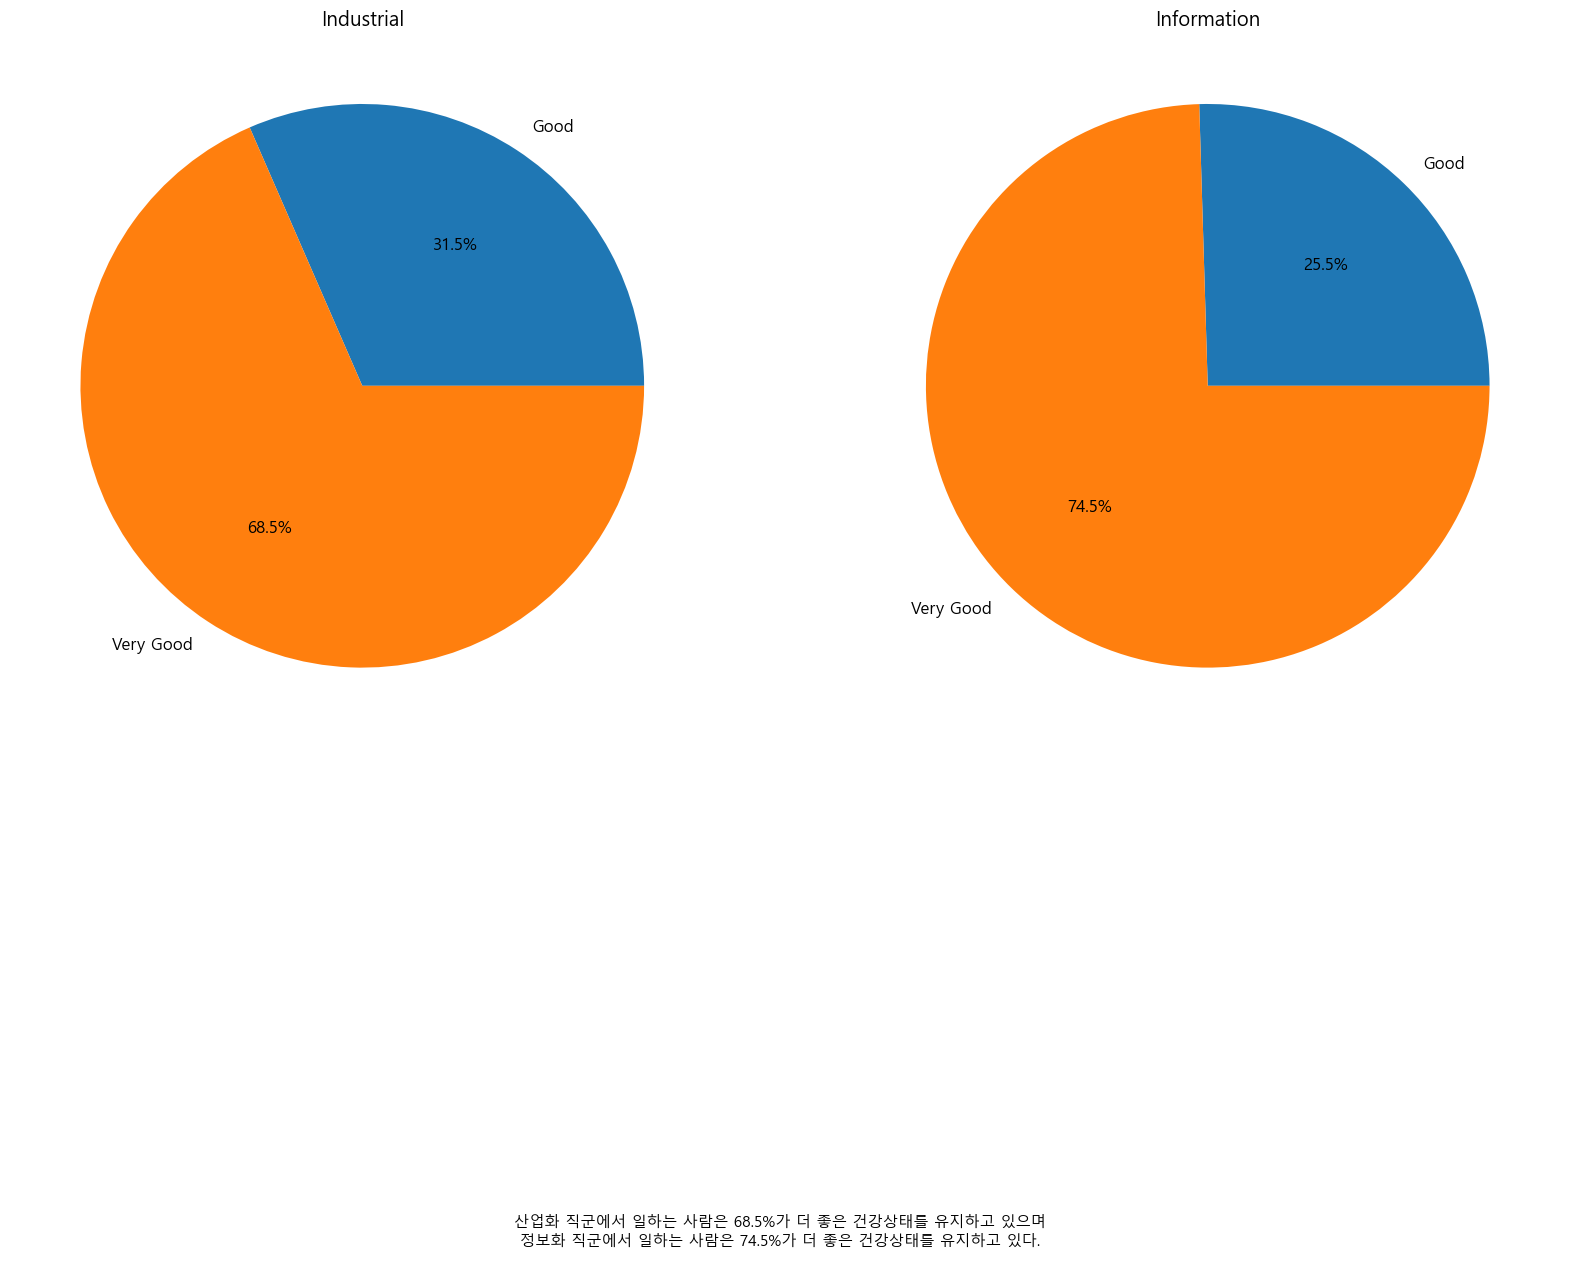

In [848]:

df1 = df[['jobclass','health']].reset_index().rename(columns={"index":'갯수'})

df1_1 = df1.query('jobclass==1')
df1_1.drop(['jobclass'],axis=1,inplace=True)
df1_2 = df1.query('jobclass==2')
df1_2.drop(['jobclass'],axis=1,inplace=True)
fig, (ax1,ax2) = plt.subplots(1,2)
pvt1 = pivot_table(df1_1,index=['health'],aggfunc='count')
pvt2 = pivot_table(df1_2,index=['health'],aggfunc='count')
pvt1.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['Good','Very Good'],legend=False,ax=ax1)
pvt2.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['Good','Very Good'],legend=False,ax=ax2)
ax1.set_title('Industrial')
ax2.set_title('Information')
ax1.set_ylabel('')
ax2.set_ylabel('')

txt = """
산업화 직군에서 일하는 사람은 68.5%가 더 좋은 건강상태를 유지하고 있으며
정보화 직군에서 일하는 사람은 74.5%가 더 좋은 건강상태를 유지하고 있다.
 """
plt.figtext(0.51, 0.09, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제6(7) 파이그래프.png',dpi=200)

plt.show()
plt.close()


8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

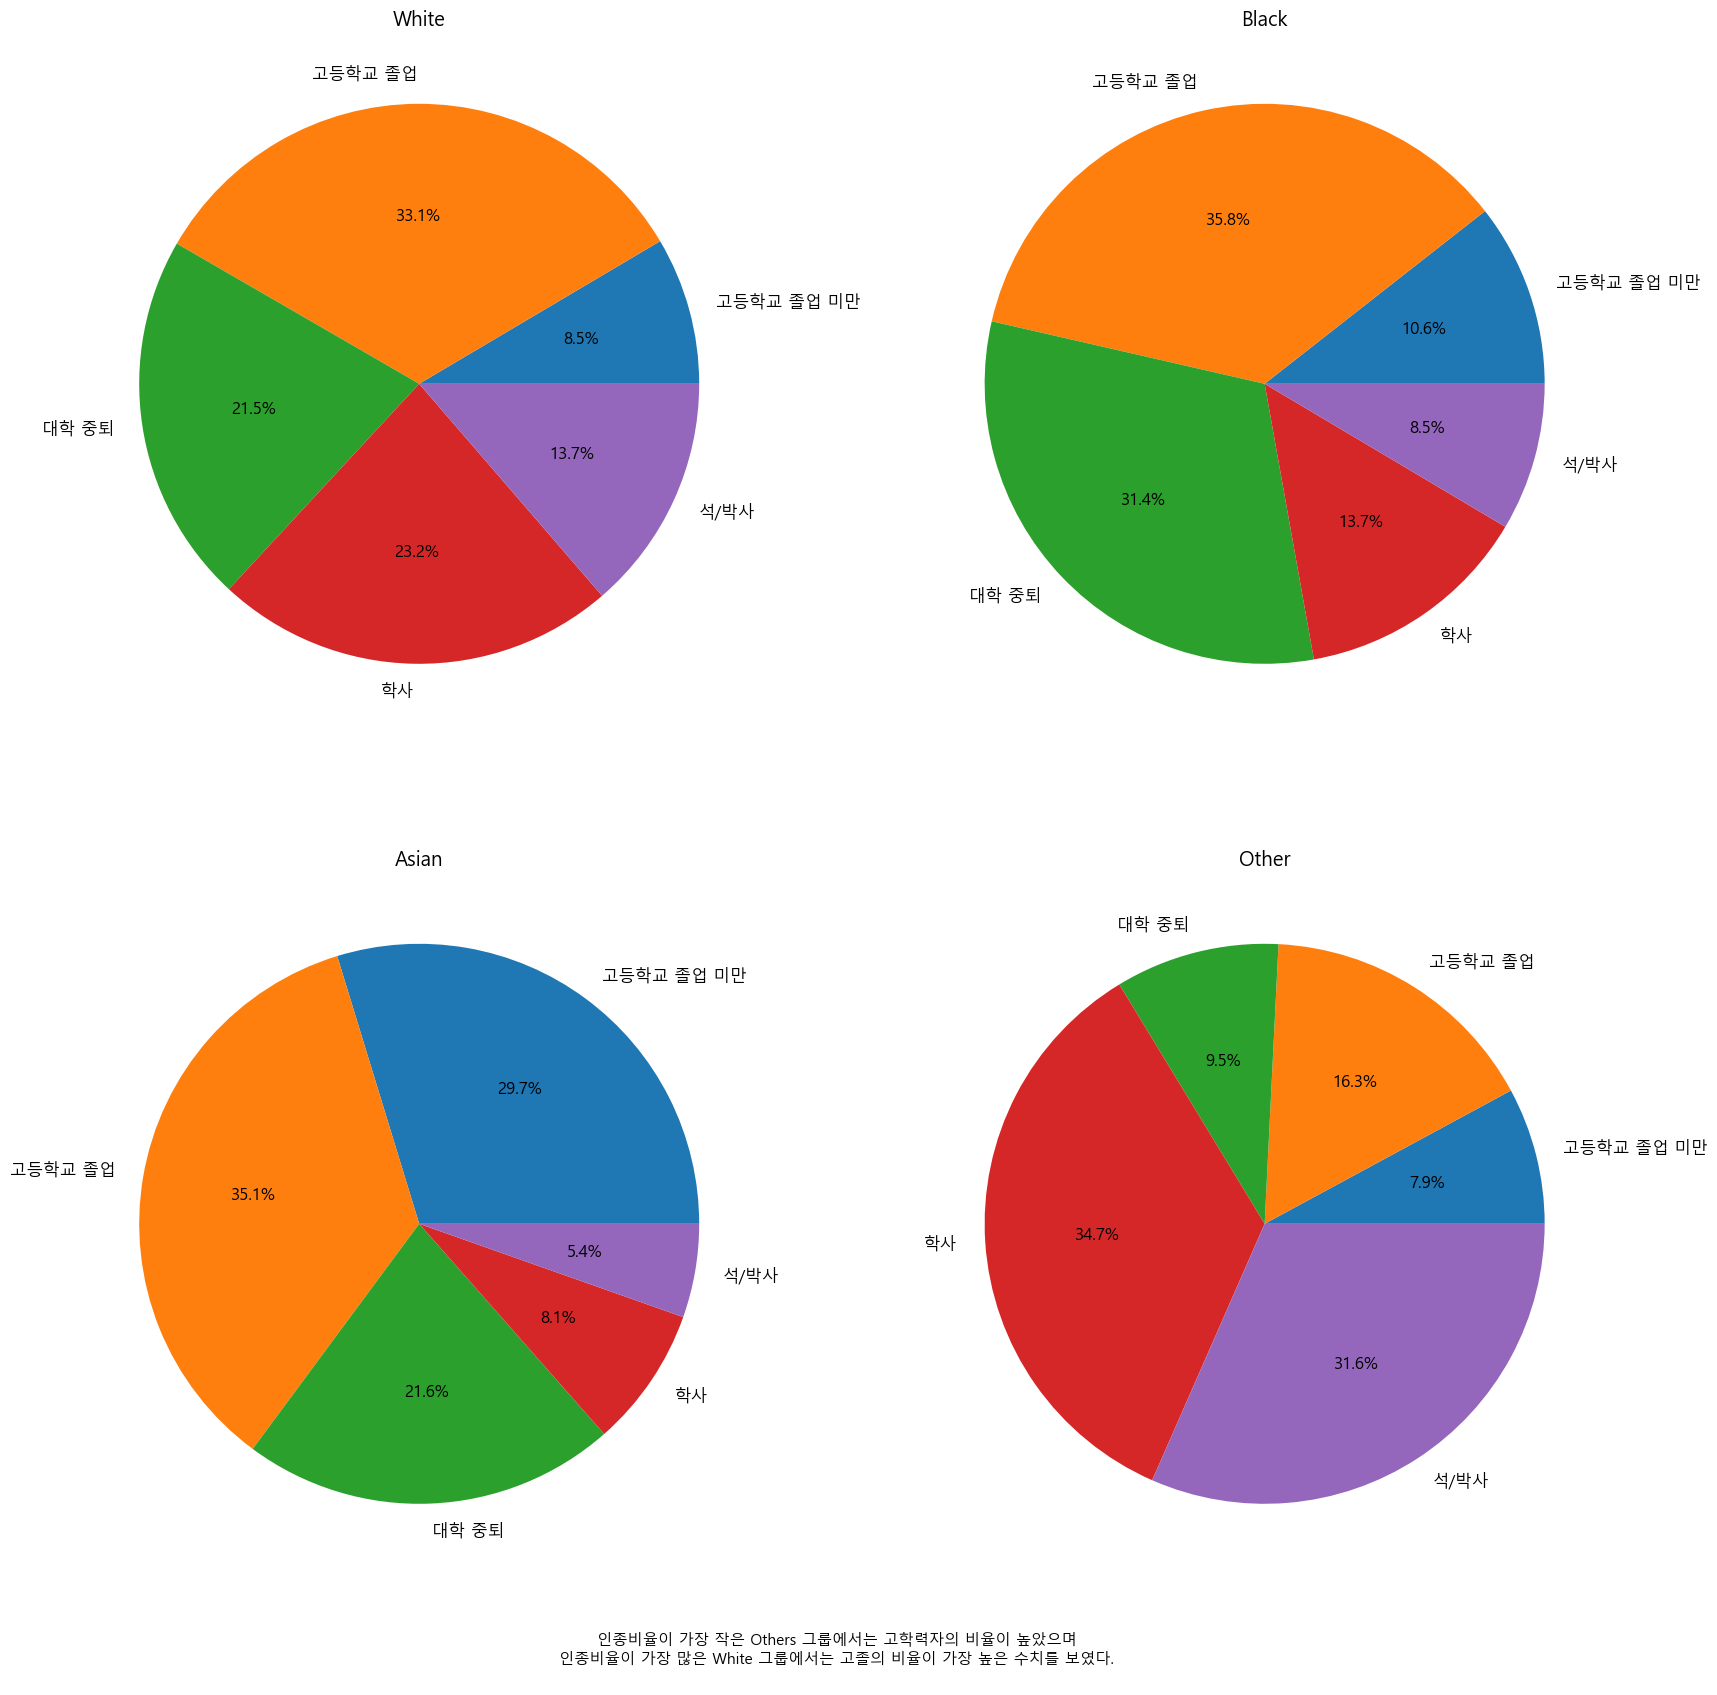

In [849]:
df1 = df[['race','education']].reset_index().rename(columns={"index":'인원수'})
df1


df1_1 = df1.query('race==1')
df1_1.drop(['race'],axis=1,inplace=True)
df1_2 = df1.query('race==2')
df1_2.drop(['race'],axis=1,inplace=True)
df1_3 = df1.query('race==3')
df1_3.drop(['race'],axis=1,inplace=True)
df1_4 = df1.query('race==4')
df1_4.drop(['race'],axis=1,inplace=True)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
pvt1 = pivot_table(df1_1,index=['education'],aggfunc='count')
pvt2 = pivot_table(df1_2,index=['education'],aggfunc='count')
pvt4 = pivot_table(df1_3,index=['education'],aggfunc='count')
pvt3 = pivot_table(df1_4,index=['education'],aggfunc='count')

pvt1.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['고등학교 졸업 미만','고등학교 졸업','대학 중퇴','학사','석/박사'],legend=False,ax=ax1)
pvt2.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['고등학교 졸업 미만','고등학교 졸업','대학 중퇴','학사','석/박사'],legend=False,ax=ax2)
pvt3.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['고등학교 졸업 미만','고등학교 졸업','대학 중퇴','학사','석/박사'],legend=False,ax=ax3)
pvt4.plot(kind='pie',subplots=True,autopct='%0.1f%%',labels=['고등학교 졸업 미만','고등학교 졸업','대학 중퇴','학사','석/박사'],legend=False,ax=ax4)
ax1.set_title('White')
ax2.set_title('Black')
ax3.set_title('Asian')
ax4.set_title('Other')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

txt = """
인종비율이 가장 작은 Others 그룹에서는 고학력자의 비율이 높았으며
인종비율이 가장 많은 White 그룹에서는 고졸의 비율이 가장 높은 수치를 보였다.
 """
plt.figtext(0.51, 0.09, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})
plt.savefig('문제6(8) 파이그래프.png',dpi=200)

plt.show()
plt.close()


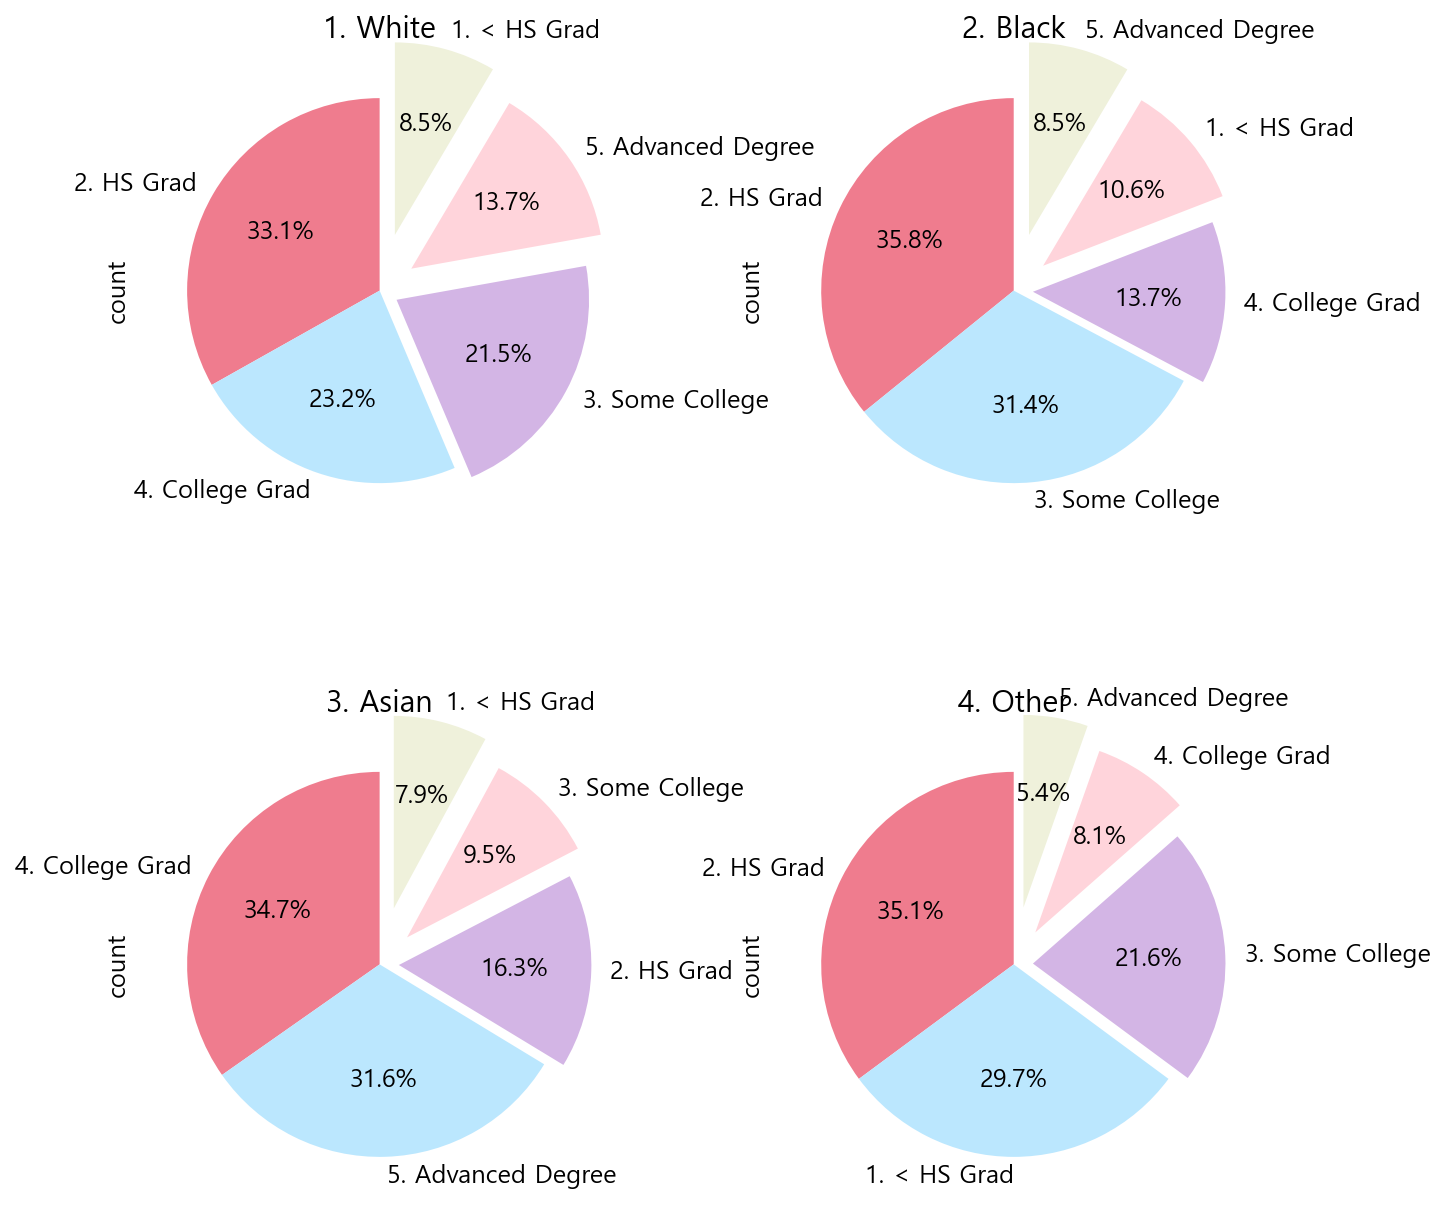

In [850]:
# 강사님 풀이 for문이용해서 같은그래프를 한꺼번에 처리

df6 = read_excel('https://data.hossam.kr/pydata/wage.xlsx')
cdf = df6.drop(['year', 'age', 'logwage', 'wage'], axis=1)
edf = cdf.filter(['education', 'race'])
race = sorted(edf['race'].unique())
count = len(race)
rows = count // 2 +( 1 if count%2 else 0)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows*5), dpi=150)
fig.subplots_adjust(hspace=0.4)
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        if idx >= count:
            axes[i][j].axis('off')
            break

        axes[i][j].title.set_text(race[idx])
        axes[i][j].set(ylabel=None)
        mdf = edf[edf['race'] == race[idx]]
        mdf['education'].value_counts().plot.pie(ax=axes[i][j], autopct='%1.1f%%', startangle=90,
                                                 colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
                                                 explode=[0, 0, 0.1, 0.2, 0.3])
